# Prodigy Finance ComputeFest Exploratory Visualization Contest 2017
**Team**: Stephen Camera-Murray and John Camera  
**Contact**: stephen.cameramurray@gmail.com, john.camera@gmail.com
  
**Due Date: ** Thursday, January 12th, 2017 at 11:59pm

#### Import libraries

In [85]:
# import libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as DecisionTree

# set the seaborn chart style
sns.set_style ( 'white' )

%matplotlib inline

# suppress warnings
warnings.filterwarnings ( 'ignore' )

#### Load data and view it

In [4]:
# load data into a pandas df
forestDF = pd.read_csv ( './datasets/covtype.data.gz', header=None )

# add column names
forestDF.columns = \
'Elevation Aspect Slope Horizontal_Distance_To_Hydrology Vertical_Distance_To_Hydrology Horizontal_Distance_To_Roadways Hillshade_9am Hillshade_Noon Hillshade_3pm Horizontal_Distance_To_Fire_Points'.split() \
+ [ 'Wilderness_Area_' + str(x) for x in range (1,5) ] \
+ [ 'Soil_Type_' + str(x) for x in range (1,41) ] \
+ [ 'Cover_Type' ]

# display the first five rows
forestDF.head ( n = 5 )

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points     ...      Soil_Type_32  Soil_Type_33  \
0                                6279     ...                 0             0   
1                                6225     ...                 0             0   
2                                6121     ...                 0             0   
3                                6211     ...                 0             0   
4                                6172     ...                 0             0   

   Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  Soil_Type_38  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Soil_Type_39  Soil_Type_40  Cover_Type  
0             0             0           5  
1             0             0           5  
2             0             0           2  
3             0             0           2  
4             0             0           5  

[5 rows x 55 columns]

In [5]:
print 'The dataset has {0} observations and {1} attributes'.format ( forestDF.shape[0], ( forestDF.shape[1] - 1) )

The dataset has 581012 observations and 54 attributes


#### Visualize forest cover distribution

In [33]:
# get counts 
ctype_count = forestDF.groupby('Cover_Type').size()

# create list of forest cover types
ctype = 'Spruce/Fir LodgepolePine PonderosaPine Cottonwood/Willow Aspen Douglas-fir Krummholz'.split()

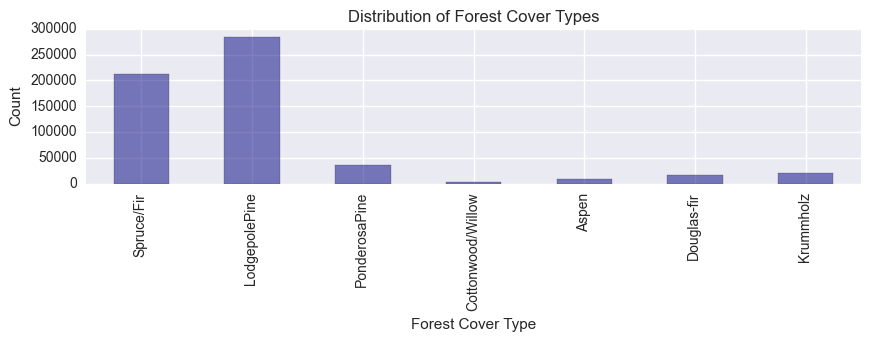

In [34]:
from matplotlib import cm

# create histogram
ax = ctype_count.plot(kind='bar', figsize=(10,2), alpha=0.5, color='#000080')
ax.set_title('Distribution of Forest Cover Types')
ax.set_xticklabels(ctype)
ax.set_xlabel('Forest Cover Type')
ax.set_ylabel('Count')
plt.show()

By looking at the forest cover type histogram, we can see that most are either Spruce/Fir or Lodgepole Pine.

#### Visualize correlations

Next we create a correlation matrix and visualize with a heatmap.

In [8]:
# calc the correlation matrix
corr = forestDF.corr()

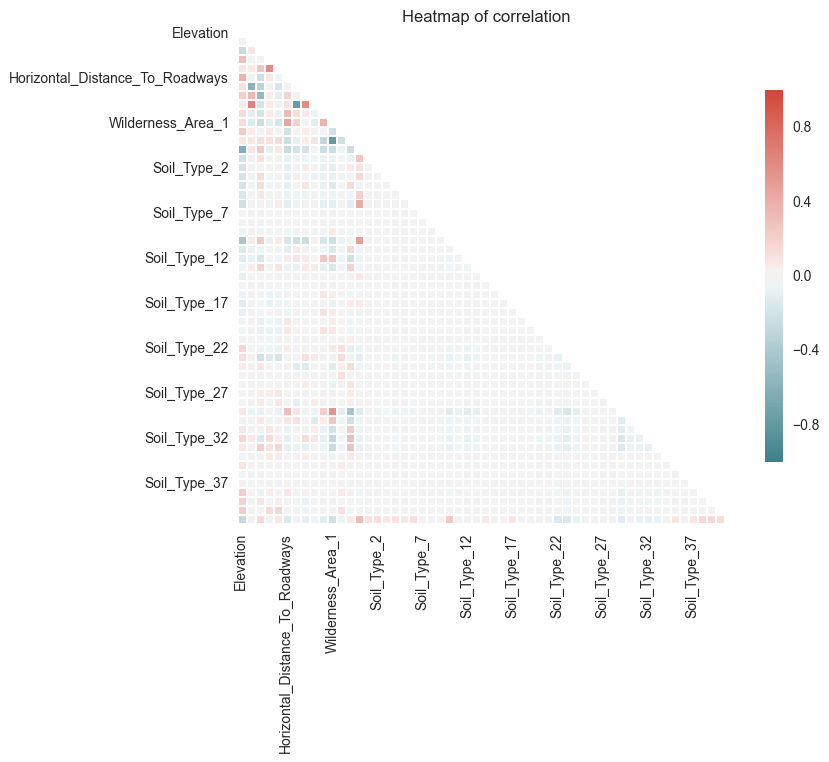

In [9]:
#set up figure
f, ax = plt.subplots(figsize=(8, 12))

# set the seaborn chart style
sns.set_style ( 'white' )

# create a mask for redundant correlations
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# draw the correlation heatmap
sns.heatmap( corr, mask=mask, square=True, xticklabels=5, yticklabels=5, linewidths=.5
                   ,cbar_kws={"shrink": .4},cmap = sns.diverging_palette(210, 15, as_cmap=True), ax=ax)

ax.set_title('Heatmap of correlation')
plt.show()

By using a diverging palette, the strongly correlated features have more color than those with less correlation. The very bottom row is most important in that it shows us how strongly each feature is correlated with our prediction target, the forest cover type.

#### Derive climatic and geological zones
From the heatmap, we notice some clusters of correlation between the various soil types. Looking at the dataset description, we notice that the soil types are broadly categorized by climatic and geological zones. Let's add these features in to see if these are predictive.

In [10]:
# add new columns for zones
forestDF['Climatic_Zone'] = 7 # default to save coding
forestDF['Geologic_Zone'] = 7 # default to save coding

In [11]:
## Update climate zone based on soil type's ELU code (first digit)
#
# Climate zone 2
forestDF.loc[(forestDF.Soil_Type_1 + forestDF.Soil_Type_2 + forestDF.Soil_Type_3 + \
              forestDF.Soil_Type_4 + forestDF.Soil_Type_5 + forestDF.Soil_Type_6) > 0, "Climatic_Zone"] = 2
# Climate zone 3
forestDF.loc[(forestDF.Soil_Type_7 + forestDF.Soil_Type_8) > 0, "Climatic_Zone"] = 3
# Climate zone 4
forestDF.loc[(forestDF.Soil_Type_9  + forestDF.Soil_Type_10 + forestDF.Soil_Type_11 + \
              forestDF.Soil_Type_12 + forestDF.Soil_Type_13) > 0, "Climatic_Zone"] = 4
# Climate zone 5
forestDF.loc[(forestDF.Soil_Type_14 + forestDF.Soil_Type_15) > 0, "Climatic_Zone"] = 5
# Climate zone 6
forestDF.loc[(forestDF.Soil_Type_16 + forestDF.Soil_Type_17 + forestDF.Soil_Type_18) > 0, "Climatic_Zone"] = 6
# Climate zone 8
forestDF.loc[(forestDF.Soil_Type_35 + forestDF.Soil_Type_36 + forestDF.Soil_Type_37 + \
              forestDF.Soil_Type_38 + forestDF.Soil_Type_39 + forestDF.Soil_Type_40) > 0, "Climatic_Zone"] = 8

In [12]:
## Update geologic zone based on soil type's ELU code (second digit)
#
# Geologic zone 1
forestDF.loc[(forestDF.Soil_Type_14 + forestDF.Soil_Type_15 + forestDF.Soil_Type_16 + \
              forestDF.Soil_Type_17 + forestDF.Soil_Type_19 + forestDF.Soil_Type_20 + \
              forestDF.Soil_Type_21) > 0, "Geologic_Zone"] = 1
# Geologic zone 2
forestDF.loc[(forestDF.Soil_Type_9 + forestDF.Soil_Type_22 + forestDF.Soil_Type_23) > 0, "Geologic_Zone"] = 2
#
# Geologic zone 5
forestDF.loc[(forestDF.Soil_Type_7 + forestDF.Soil_Type_8) > 0, "Geologic_Zone"] = 5

#### Feature reduction
We'll build a decision tree model to determine feature importance and visualize it. **Note**: we train the model on the entire dataset because we only want to get the feature importance for reduction.

In [13]:
# get our Xs and ys
X = forestDF.drop ( [ 'Cover_Type' ], axis = 1 )
y = forestDF.Cover_Type

In [14]:
# train a decision tree model
dtree = DecisionTree ()
model = dtree.fit ( X, y )

In [15]:
# get the feature importance
importance_list = dtree.feature_importances_
name_list = X.columns
importance_list, name_list = zip ( *sorted(zip(importance_list, name_list), reverse=True) )

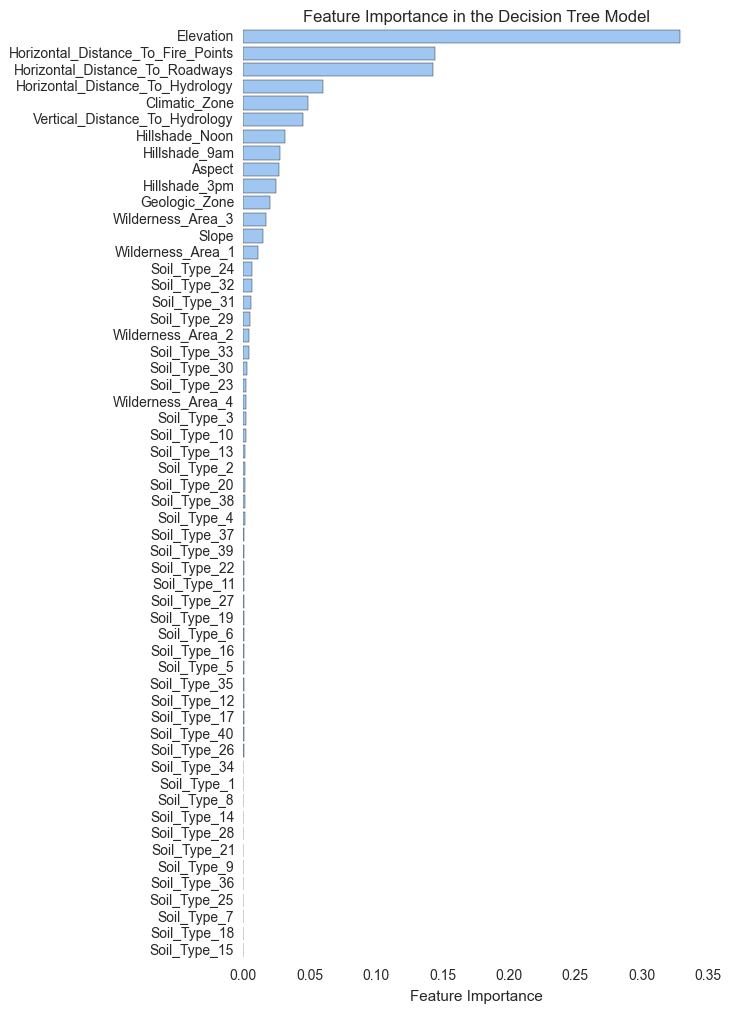

In [16]:
# initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 12))

# create the plot
sns.set_color_codes("pastel")
sns.barplot(y=name_list, x=importance_list,
            label="Total", color="b")

# add labels and style
plt.xlabel('Feature Importance')
plt.title('Feature Importance in the Decision Tree Model')
sns.set(style="whitegrid")
sns.despine(left=True, bottom=True)

Similar to the correlaton heatmap, we can see that only a limited set of features have importance for predicting the forest cover type in the decision tree model. We also note that the detailed soil type isn't as important as the climate and geologic zones that are derived from soil type.

#### Pairplots of top predictive features
Next, we chose six of the top features by importance and create pairplots of them, color-coding the forest cover types. On most of these we can see clear clustering of forest cover types which may help guide us in choosing a method for prediction.

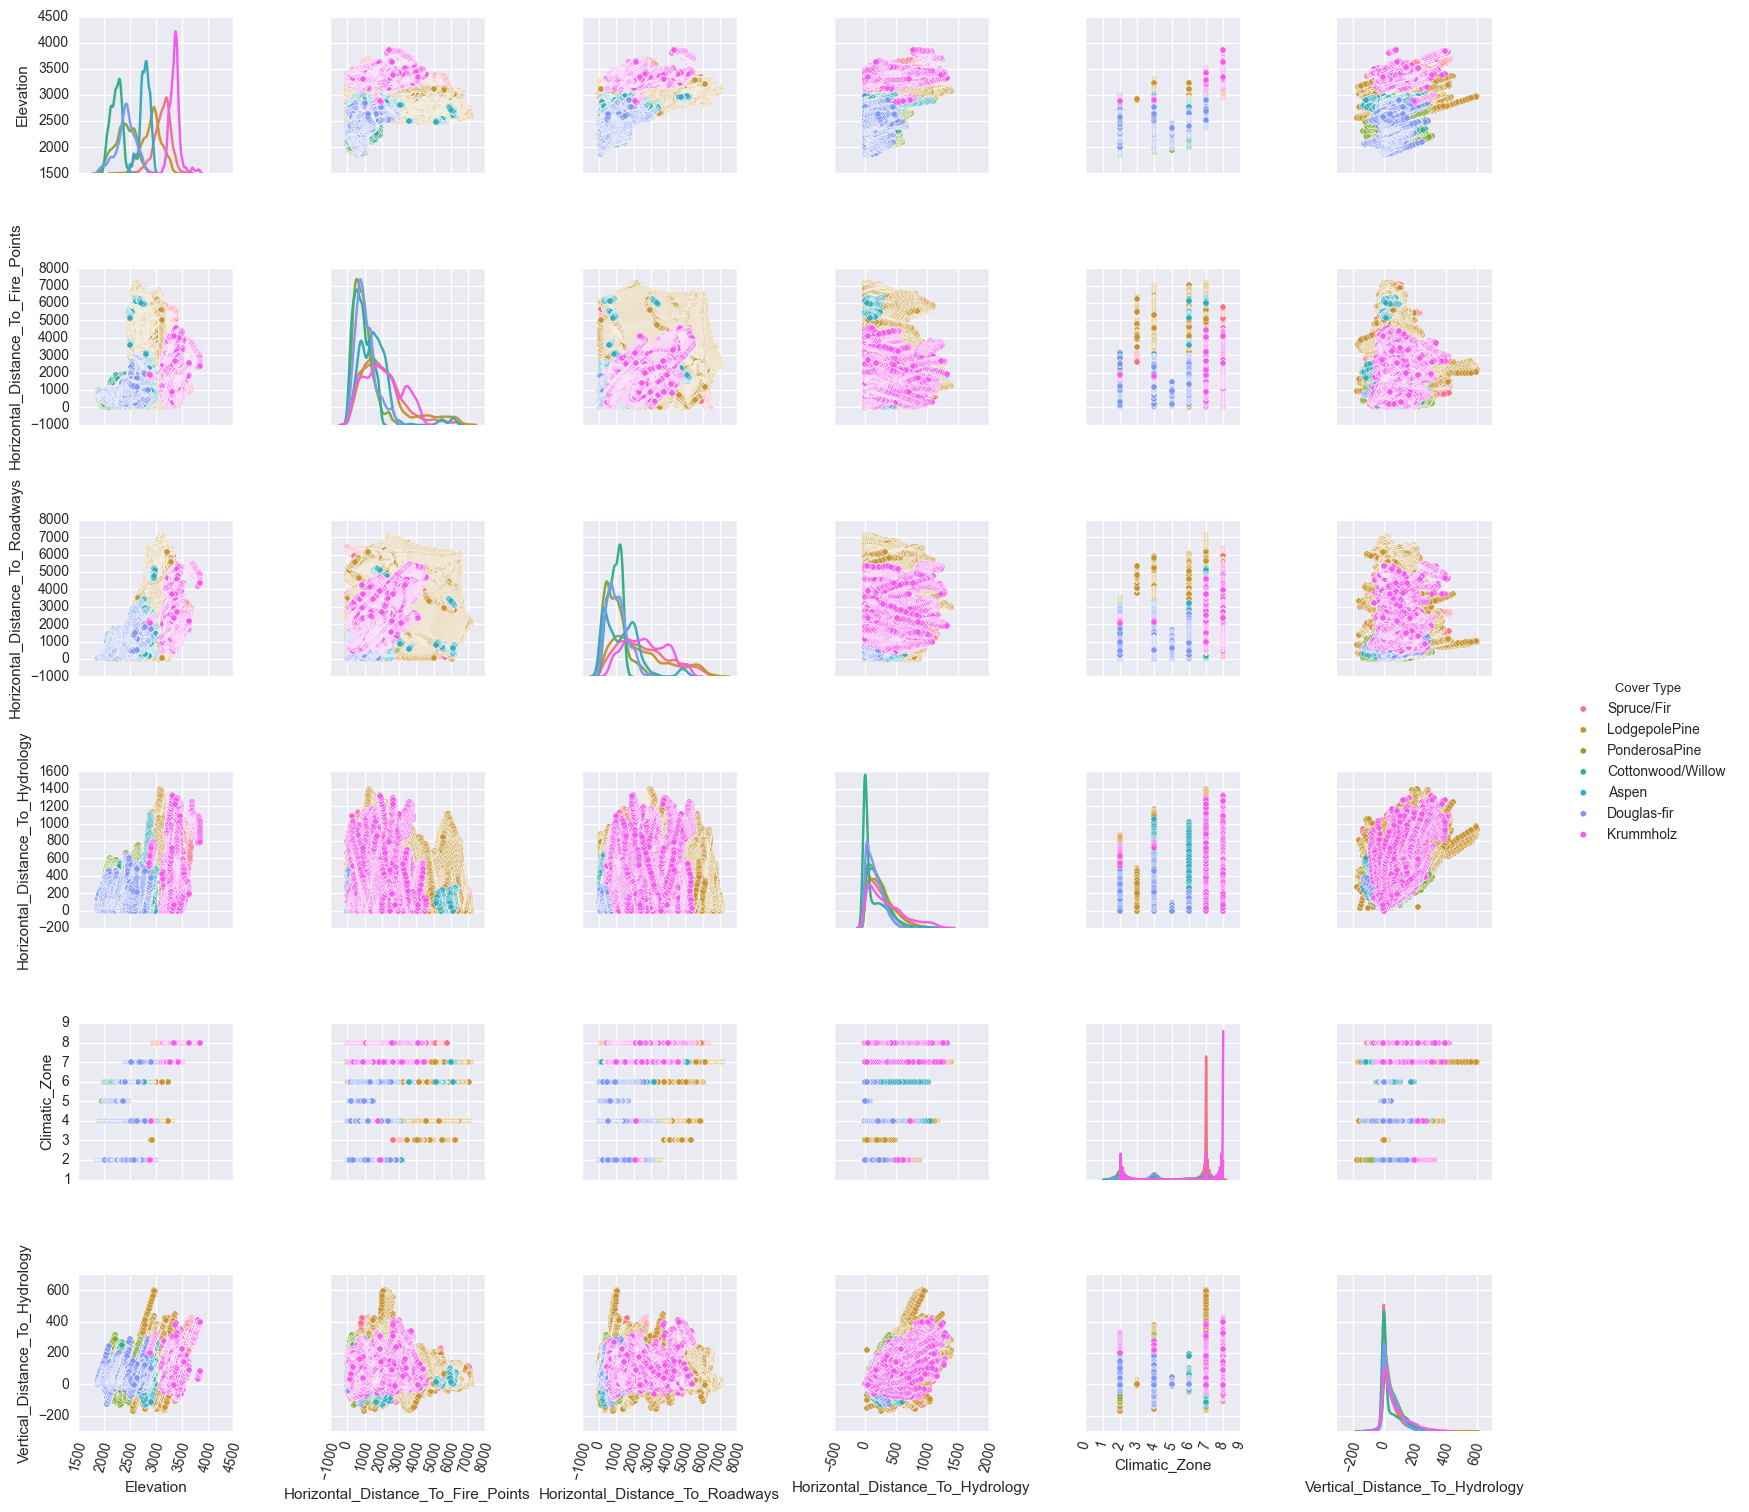

In [109]:
# initialize the matplotlib figure
plt.figure(figsize=(20, 30))

# set seaborn style
sns.set(style="darkgrid", palette="muted")

# create pairplots
g = sns.pairplot(forestDF [ np.append ( np.array(name_list[:6]), 'Cover_Type' ) ]
                ,vars = forestDF [ np.array(name_list[:6]) ], hue = 'Cover_Type', diag_kind = 'kde' )

# fix the legend labels
g.fig.get_children()[-1].set_title('Cover Type')
for i in range(len(g.fig.get_children()[-1].texts)):
    g.fig.get_children()[-1].texts[i].set_text(ctype[i])

# rotate x-tick labels
for i in g.fig.get_children()[1:-1]:
    for j in i.get_xticklabels():
        j.set_rotation (75)

# move the legend to the right and not overlap
g.fig.get_children()[-1].set_bbox_to_anchor((1.1, 0.5, 0, 0))

x = plt.show()

#### 3D plot of top three features
Finally, we note in the feature importance visualization that the top three features are far ahead in importance of all of the others, so we create a 3-D scatter plot of these top features. And we can see clear clustering of forest cover type by these features as well.

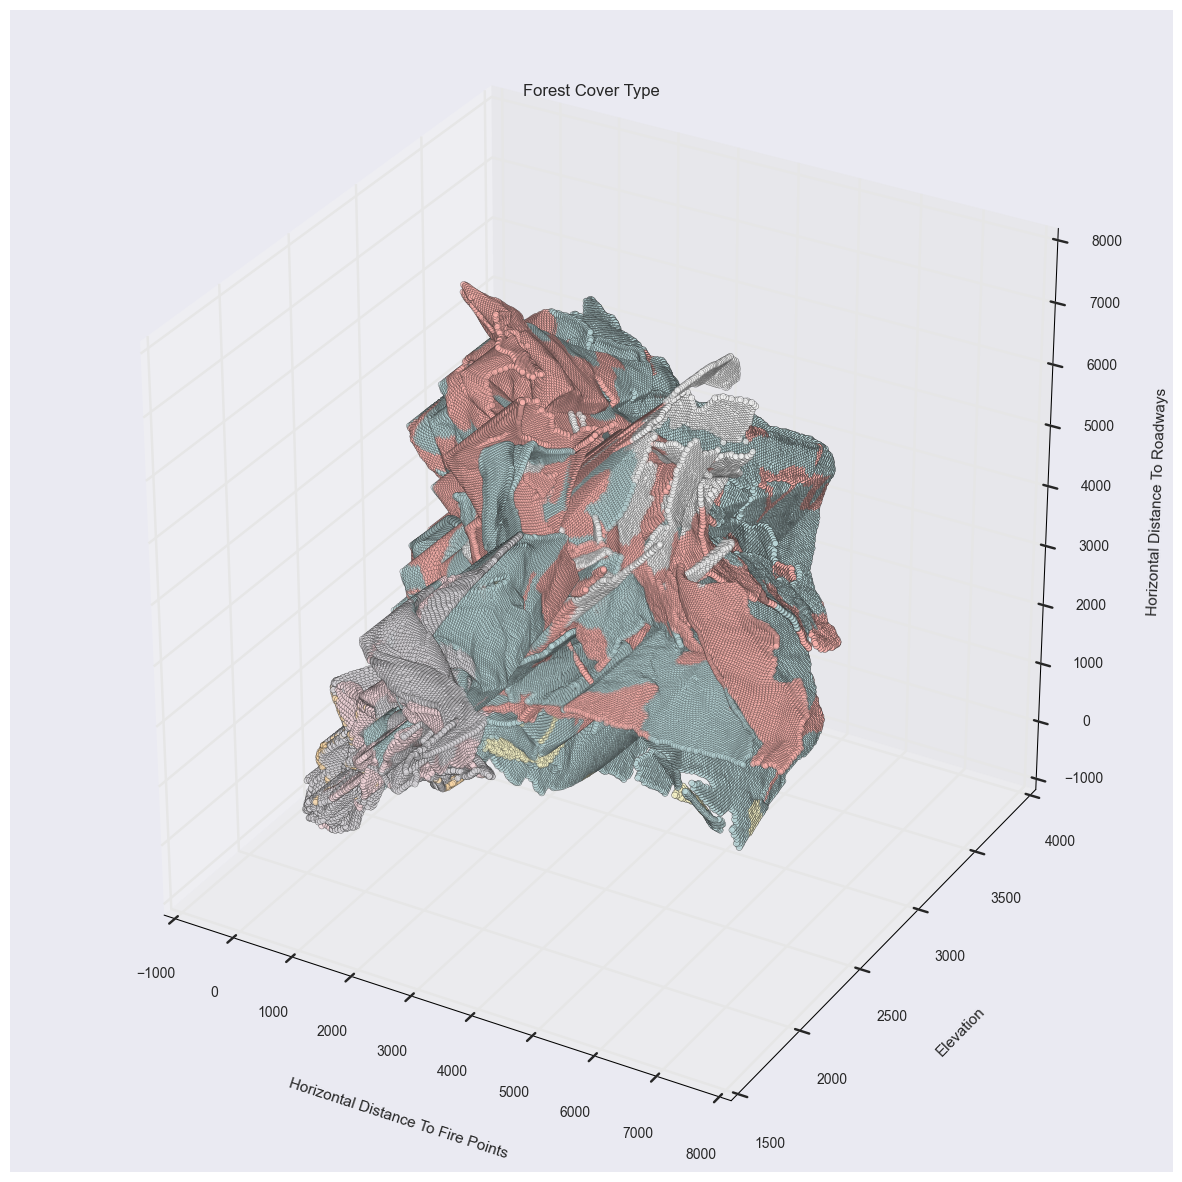

In [112]:
# initialize the matplotlib figure
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# create the 3-d scatterplot
ax.scatter(forestDF.Horizontal_Distance_To_Fire_Points, forestDF.Elevation
           , forestDF.Horizontal_Distance_To_Roadways, c=forestDF.Cover_Type,cmap = "Pastel1")

# add labels and display
ax.set_xlabel('Horizontal Distance To Fire Points')
ax.set_ylabel('Elevation')
ax.set_zlabel('Horizontal Distance To Roadways')
ax.set_title('Forest Cover Type')
plt.show()